In [9]:
import pandas as pd
import numpy as np
%pylab inline

data = pd.read_csv('winequality-white.csv', sep=";")

X = data[data.columns[:-1]].values
y = data['quality'].values

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3 ) # 30% des données dans le jeu de test

In [4]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [10]:
from sklearn import neighbors, metrics

knn = neighbors.KNeighborsRegressor(n_neighbors=11)
knn.fit(X_train_std, y_train)

KNeighborsRegressor(n_neighbors=11)

In [11]:
y_pred = knn.predict(X_test_std)

In [12]:
print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred) )))

RMSE : 0.67


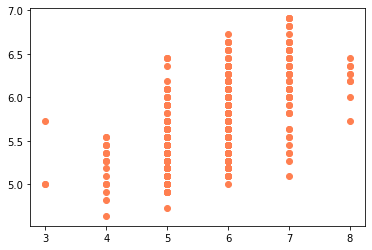

In [13]:
plt.scatter(y_test, y_pred, color='coral')

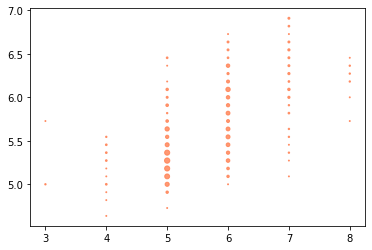

In [14]:
sizes = {} # clé : coordonnées ; valeur : nombre de points à ces coordonnées
for (yt, yp) in zip(list(y_test), list(y_pred)):
    if (yt, yp) in sizes:
        sizes[(yt, yp)] += 1
    else:
        sizes[(yt, yp)] = 1

keys = sizes.keys()
plt.scatter([k[0] for k in keys], # vraie valeur (abscisse)
            [k[1] for k in keys], # valeur predite (ordonnee)
            s=[sizes[k] for k in keys], # taille du marqueur
            color='coral', alpha =0.8)

In [15]:
y_pred_random = np.random.randint(np.min(y), np.max(y), y_test.shape)

In [16]:
print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_random))))

RMSE : 1.76


In [17]:
from sklearn import dummy
dum = dummy.DummyRegressor(strategy='mean')

# Entraînement
dum.fit(X_train_std, y_train)

# Prédiction sur le jeu de test
y_pred_dum = dum.predict(X_test_std)

# Evaluate
print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_dum))))

RMSE : 0.84
